## Convolutional Neural Networks on Keras

This is just a wrapper of the notebook `cifar10_cnn` provided by Udacity. I am interested in comparing the same architecture by first running on my local machine and then in an Amazon Web Services Elastic Cloud Computing - AWS EC2

Ref: 

[Running Jupyter Notebook on GPU on AWS](https://blog.keras.io/running-jupyter-notebooks-on-gpu-on-aws-a-starter-guide.html)

[Deep Learning With Jupyter Notebooks In The Cloud](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws)

[]()

In AWS EC2 I am using instance type: 

GPU compute - p2.xlarge

Keep the default configuration for the steps "Configure Instance", "Add Storage", "Add Tags". But we will customize the step "Configure Security Group".

In Configure Security Group:

* Add rule
* Port range: 8888
* Source: My IP



---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

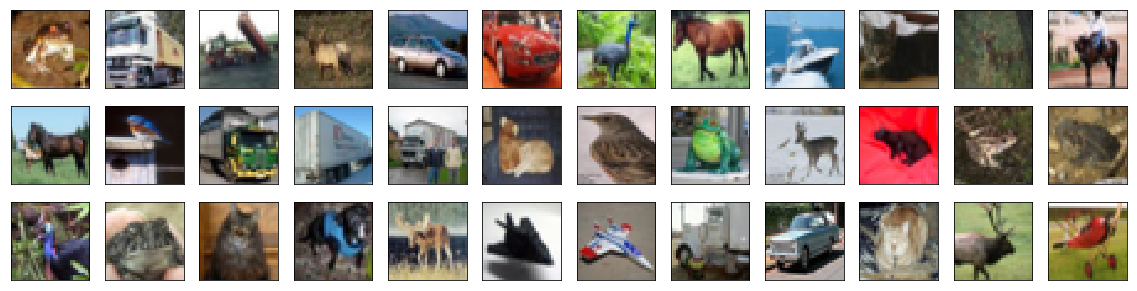

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

('x_train shape:', (45000, 32, 32, 3))
(45000, 'train samples')
(10000, 'test samples')
(5000, 'validation samples')


### 5. Define the Model Architecture (* skip if using other architecture)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7.1 Train the Model (locally)

In [7]:
from keras.callbacks import ModelCheckpoint   

# Time training locally. This will later be compared to AWS EC2 trining time
import time
start_time = time.time()

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

# Print training time
print("--- %s seconds with local machine" % (time.time() - start_time))

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00001: val_loss improved from inf to 1.95091, saving model to model.weights.best.hdf5
 - 23s - loss: 1.6222 - acc: 0.4120 - val_loss: 1.9509 - val_acc: 0.3492
Epoch 2/100
Epoch 00002: val_loss improved from 1.95091 to 1.41129, saving model to model.weights.best.hdf5
 - 23s - loss: 1.2896 - acc: 0.5413 - val_loss: 1.4113 - val_acc: 0.5248
Epoch 3/100
Epoch 00003: val_loss improved from 1.41129 to 1.10328, saving model to model.weights.best.hdf5
 - 23s - loss: 1.1576 - acc: 0.5936 - val_loss: 1.1033 - val_acc: 0.6142
Epoch 4/100
Epoch 00004: val_loss improved from 1.10328 to 1.05631, saving model to model.weights.best.hdf5
 - 23s - loss: 1.0816 - acc: 0.6221 - val_loss: 1.0563 - val_acc: 0.6224
Epoch 5/100
Epoch 00005: val_loss improved from 1.05631 to 0.98761, saving model to model.weights.best.hdf5
 - 23s - loss: 1.0328 - acc: 0.6390 - val_loss: 0.9876 - val_acc: 0.6542
Epoch 6/100
Epoch 00006: val_loss did not improve


Epoch 64/100
Epoch 00064: val_loss did not improve
 - 23s - loss: 1.7092 - acc: 0.4128 - val_loss: 1.9889 - val_acc: 0.4376
Epoch 65/100
Epoch 00065: val_loss did not improve
 - 25s - loss: 1.6904 - acc: 0.4206 - val_loss: 1.9525 - val_acc: 0.4838
Epoch 66/100
Epoch 00066: val_loss did not improve
 - 23s - loss: 1.6854 - acc: 0.4178 - val_loss: 1.9584 - val_acc: 0.4452
Epoch 67/100
Epoch 00067: val_loss did not improve
 - 23s - loss: 1.7096 - acc: 0.4120 - val_loss: 1.4428 - val_acc: 0.4934
Epoch 68/100
Epoch 00068: val_loss did not improve
 - 23s - loss: 1.7078 - acc: 0.4090 - val_loss: 1.9811 - val_acc: 0.4292
Epoch 69/100
Epoch 00069: val_loss did not improve
 - 23s - loss: 1.7162 - acc: 0.4047 - val_loss: 1.4698 - val_acc: 0.4888
Epoch 70/100
Epoch 00070: val_loss did not improve
 - 23s - loss: 1.7142 - acc: 0.4068 - val_loss: 1.5635 - val_acc: 0.4746
Epoch 71/100
Epoch 00071: val_loss did not improve
 - 25s - loss: 1.7244 - acc: 0.4012 - val_loss: 2.3274 - val_acc: 0.3452
Epoch 72

### 7.2 Train the model with AWS EC2

The resulting time running on AWS EC2 using a GPU compute p2.xlarge instance was:

--- 3409.5718379 seconds 

So I will continue locally

### 8. Load the Model with the Best Validation Accuracy

In [8]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [9]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.67830000000000001)


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [10]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

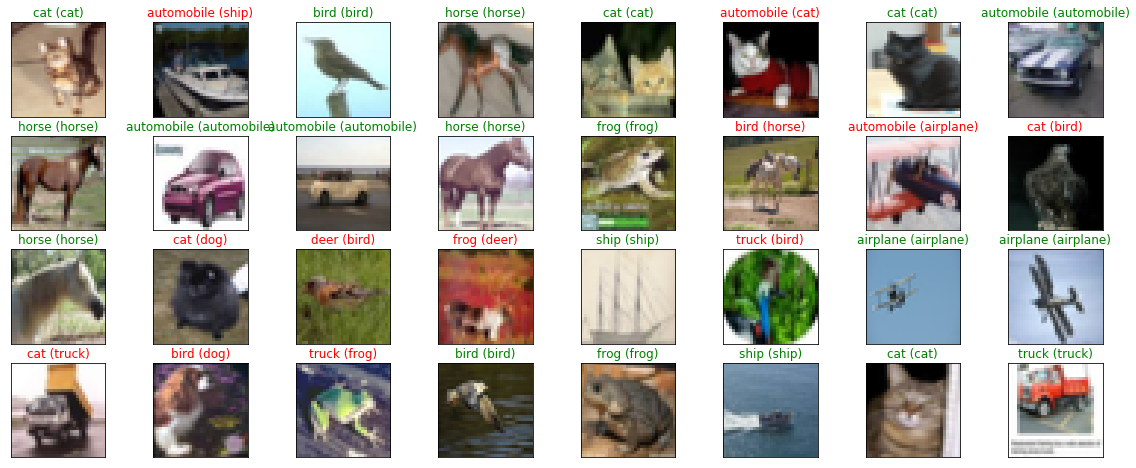

In [11]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

--------------

--------------

### Let's define a different architecture (* Use this instead)

check optimizer `adam`

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        1040      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
__________

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00001: val_loss improved from inf to 1.14586, saving model to model.weights.best.hdf5
 - 42s - loss: 1.0282 - acc: 0.6476 - val_loss: 1.1459 - val_acc: 0.6088
Epoch 2/100
Epoch 00002: val_loss improved from 1.14586 to 0.97548, saving model to model.weights.best.hdf5
 - 41s - loss: 0.9956 - acc: 0.6590 - val_loss: 0.9755 - val_acc: 0.6784
Epoch 3/100
Epoch 00003: val_loss improved from 0.97548 to 0.88929, saving model to model.weights.best.hdf5
 - 41s - loss: 0.9687 - acc: 0.6692 - val_loss: 0.8893 - val_acc: 0.6882
Epoch 4/100
Epoch 00004: val_loss did not improve
 - 41s - loss: 0.9654 - acc: 0.6669 - val_loss: 0.9400 - val_acc: 0.6782
Epoch 5/100
Epoch 00005: val_loss did not improve
 - 41s - loss: 0.9444 - acc: 0.6722 - val_loss: 0.9716 - val_acc: 0.6692
Epoch 6/100
Epoch 00006: val_loss did not improve
 - 42s - loss: 0.9341 - acc: 0.6776 - val_loss: 0.9521 - val_acc: 0.6828
Epoch 7/100
Epoch 00007: val_loss improved 

Epoch 61/100
Epoch 00061: val_loss did not improve
 - 41s - loss: 0.6743 - acc: 0.7629 - val_loss: 0.7313 - val_acc: 0.7480
Epoch 62/100
Epoch 00062: val_loss did not improve
 - 41s - loss: 0.6682 - acc: 0.7644 - val_loss: 0.7091 - val_acc: 0.7524
Epoch 63/100
Epoch 00063: val_loss did not improve
 - 41s - loss: 0.6675 - acc: 0.7661 - val_loss: 0.7016 - val_acc: 0.7608
Epoch 64/100
Epoch 00064: val_loss did not improve
 - 41s - loss: 0.6648 - acc: 0.7666 - val_loss: 0.7008 - val_acc: 0.7580
Epoch 65/100
Epoch 00065: val_loss did not improve
 - 41s - loss: 0.6608 - acc: 0.7664 - val_loss: 0.7095 - val_acc: 0.7570
Epoch 66/100
Epoch 00066: val_loss improved from 0.69116 to 0.68865, saving model to model.weights.best.hdf5
 - 41s - loss: 0.6537 - acc: 0.7707 - val_loss: 0.6887 - val_acc: 0.7568
Epoch 67/100
Epoch 00067: val_loss did not improve
 - 41s - loss: 0.6647 - acc: 0.7674 - val_loss: 0.6909 - val_acc: 0.7624
Epoch 68/100
Epoch 00068: val_loss did not improve
 - 41s - loss: 0.6579 -

In [9]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.76880000000000004)
